# Werken met TimeSeries
Soms hebben we reeksen die gebaseerd zijn op tijden. Een voorbeeld hiervan is het bestand 'full_grouped.csv' dat we al gedownload hebben. Maar hier volgt eerst de code om het opnieuw te doen.

In [1]:
from pathlib import Path
from zipfile import ZipFile
import requests
RAPPORT_ZIP = 'rapport.zip'
URL = 'https://www.kaggle.com/api/v1/datasets/download/imdevskp/corona-virus-report'
rapport_path = Path(RAPPORT_ZIP)
if not rapport_path.exists():
    data = requests.get(URL)

    with open(RAPPORT_ZIP, mode='wb') as f:
        f.write(data.content)

    with open(RAPPORT_ZIP, 'rb') as f:
        ZipFile(f).extractall()

Vervolgens kunnen we het bestand lezen in Pandas.

In [2]:
import pandas as pd
COVID_CSV = 'full_grouped.csv'
df = pd.read_csv(COVID_CSV, delimiter=',')
df.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            35156 non-null  object
 1   Country/Region  35156 non-null  object
 2   Confirmed       35156 non-null  int64 
 3   Deaths          35156 non-null  int64 
 4   Recovered       35156 non-null  int64 
 5   Active          35156 non-null  int64 
 6   New cases       35156 non-null  int64 
 7   New deaths      35156 non-null  int64 
 8   New recovered   35156 non-null  int64 
 9   WHO Region      35156 non-null  object
dtypes: int64(7), object(3)
memory usage: 2.7+ MB


## parse_dates=[]
We zien hier dat de datum niet ingelezen is als een pandas tijd, maar als een object. We kunnen dit oplossen met het argument parse_dates. We zullen meteen ook Pandas strings gebruiken. 

In [3]:
df = pd.read_csv(COVID_CSV, delimiter=',', parse_dates=['Date'])
df = df.astype({'Country/Region':pd.StringDtype(), 'WHO Region':pd.StringDtype()})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            35156 non-null  datetime64[ns]
 1   Country/Region  35156 non-null  string        
 2   Confirmed       35156 non-null  int64         
 3   Deaths          35156 non-null  int64         
 4   Recovered       35156 non-null  int64         
 5   Active          35156 non-null  int64         
 6   New cases       35156 non-null  int64         
 7   New deaths      35156 non-null  int64         
 8   New recovered   35156 non-null  int64         
 9   WHO Region      35156 non-null  string        
dtypes: datetime64[ns](1), int64(7), string(2)
memory usage: 2.7 MB


## We bekijken alleen de gegevens van België

In [4]:
df_belgie = df.loc[df['Country/Region']=='Belgium'].copy() # om straks geen SettingWithCopyWarning te krijgen
df_belgie

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
16,2020-01-22,Belgium,0,0,0,0,0,0,0,Europe
203,2020-01-23,Belgium,0,0,0,0,0,0,0,Europe
390,2020-01-24,Belgium,0,0,0,0,0,0,0,Europe
577,2020-01-25,Belgium,0,0,0,0,0,0,0,Europe
764,2020-01-26,Belgium,0,0,0,0,0,0,0,Europe
...,...,...,...,...,...,...,...,...,...,...
34237,2020-07-23,Belgium,64847,9812,17369,37666,220,4,22,Europe
34424,2020-07-24,Belgium,65199,9817,17394,37988,352,5,25,Europe
34611,2020-07-25,Belgium,65727,9821,17425,38481,528,4,31,Europe
34798,2020-07-26,Belgium,66026,9821,17438,38767,299,0,13,Europe


## De .dt 'accessor'
We hebben al gezien dat we de string-functionaliteit kunnen aanspreken met .str. We hebben ook al gezien dat we de category functionaliteit kunnen aanspreken met .cat. Voor een Timestamp bestaat er ook zoiets: .dt. Bijvoorbeeld ik wil van elke datum het nummer van de weekdag zien.

In [5]:

df_belgie.Date.dt.weekday

16       2
203      3
390      4
577      5
764      6
        ..
34237    3
34424    4
34611    5
34798    6
34985    0
Name: Date, Length: 188, dtype: int32

## Date als index
Misschien dat het een goed idee is om Date als index te gebruiken

In [6]:
df_belgie.set_index('Date', inplace=True)
df_belgie.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 188 entries, 2020-01-22 to 2020-07-27
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Country/Region  188 non-null    string
 1   Confirmed       188 non-null    int64 
 2   Deaths          188 non-null    int64 
 3   Recovered       188 non-null    int64 
 4   Active          188 non-null    int64 
 5   New cases       188 non-null    int64 
 6   New deaths      188 non-null    int64 
 7   New recovered   188 non-null    int64 
 8   WHO Region      188 non-null    string
dtypes: int64(7), string(2)
memory usage: 14.7 KB


## Datuminfo van een DatetimeIndex
Omdat dit een specifiek type is voor een Datetime van een Index, moeten we geen .dt gebruiken

In [7]:
df_belgie['weekdag'] = df_belgie.index.weekday
df_belgie

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region,weekdag
Date,,,,,,,,,,
2020-01-22,Belgium,0,0,0,0,0,0,0,Europe,2
2020-01-23,Belgium,0,0,0,0,0,0,0,Europe,3
2020-01-24,Belgium,0,0,0,0,0,0,0,Europe,4
2020-01-25,Belgium,0,0,0,0,0,0,0,Europe,5
2020-01-26,Belgium,0,0,0,0,0,0,0,Europe,6
...,...,...,...,...,...,...,...,...,...,...
2020-07-23,Belgium,64847,9812,17369,37666,220,4,22,Europe,3
2020-07-24,Belgium,65199,9817,17394,37988,352,5,25,Europe,4
2020-07-25,Belgium,65727,9821,17425,38481,528,4,31,Europe,5


## .to_period('W')
We kunnen nu op basis van de datum (index) een periode definiëren, bijvoorbeeld de week. Van elke record wordt er nu aangegeven tot welke week hij behoort.

In [8]:

df_belgie = df.loc[df['Country/Region']=='Belgium'].copy() # Voorkomt de SettingWithCopyWarning
df_belgie = df_belgie.set_index('Date')
df_belgie['period'] = df_belgie.index.to_period('W')
df_belgie

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region,period
Date,,,,,,,,,,
2020-01-22,Belgium,0,0,0,0,0,0,0,Europe,2020-01-20/2020-01-26
2020-01-23,Belgium,0,0,0,0,0,0,0,Europe,2020-01-20/2020-01-26
2020-01-24,Belgium,0,0,0,0,0,0,0,Europe,2020-01-20/2020-01-26
2020-01-25,Belgium,0,0,0,0,0,0,0,Europe,2020-01-20/2020-01-26
2020-01-26,Belgium,0,0,0,0,0,0,0,Europe,2020-01-20/2020-01-26
...,...,...,...,...,...,...,...,...,...,...
2020-07-23,Belgium,64847,9812,17369,37666,220,4,22,Europe,2020-07-20/2020-07-26
2020-07-24,Belgium,65199,9817,17394,37988,352,5,25,Europe,2020-07-20/2020-07-26
2020-07-25,Belgium,65727,9821,17425,38481,528,4,31,Europe,2020-07-20/2020-07-26


## Groeperen per period
En nu kunnen we groeperen: totaal New cases voor elke week

In [9]:
df_per_week = df_belgie.groupby('period')['New cases'].sum()
df_per_week

period
2020-01-20/2020-01-26       0
2020-01-27/2020-02-02       0
2020-02-03/2020-02-09       1
2020-02-10/2020-02-16       0
2020-02-17/2020-02-23       0
2020-02-24/2020-03-01       1
2020-03-02/2020-03-08     198
2020-03-09/2020-03-15     686
2020-03-16/2020-03-22    2515
2020-03-23/2020-03-29    7435
2020-03-30/2020-04-05    8855
2020-04-06/2020-04-12    9956
2020-04-13/2020-04-19    8849
2020-04-20/2020-04-26    7638
2020-04-27/2020-05-03    3772
2020-05-04/2020-05-10    3175
2020-05-11/2020-05-17    2199
2020-05-18/2020-05-24    1812
2020-05-25/2020-05-31    1289
2020-06-01/2020-06-07     845
2020-06-08/2020-06-14     803
2020-06-15/2020-06-21     521
2020-06-22/2020-06-28     745
2020-06-29/2020-07-05     721
2020-07-06/2020-07-12     691
2020-07-13/2020-07-19     999
2020-07-20/2020-07-26    2320
2020-07-27/2020-08-02     402
Freq: W-SUN, Name: New cases, dtype: int64

## In een grafiek

<Axes: xlabel='period'>

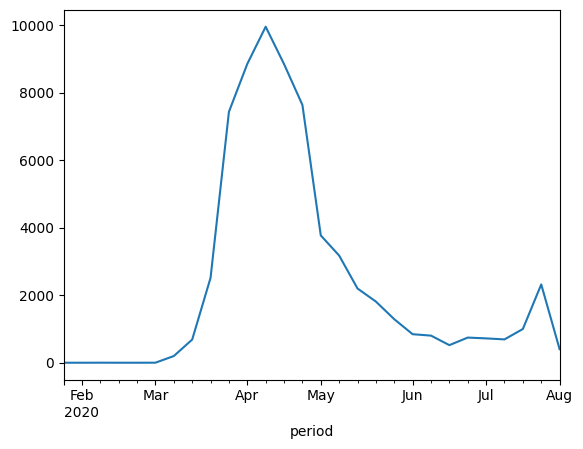

In [10]:
df_per_week.plot()

## Een alternatief is de resample() functie
De resample()-functie werkt alleen met een Datetime Index. We kunnen de gegevens groeperen per week ('W') en vervolgens een aggregatiefunctie erop loslaten, zoals bijvoorbeel .sum()

<Axes: xlabel='Date'>

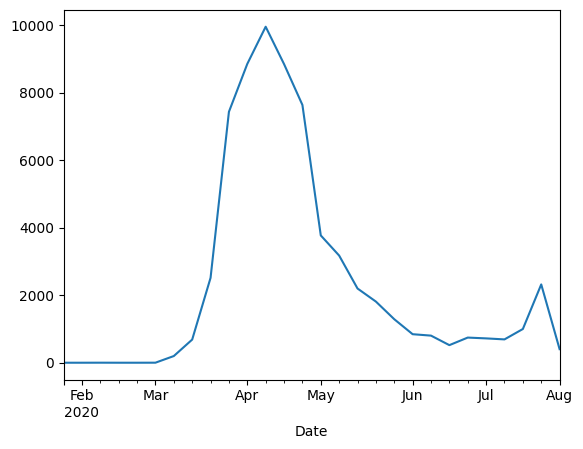

In [11]:
df_belgie = df[df['Country/Region']=='Belgium'].copy() # Voorkomt de SettingWithCopyWarning
df_belgie = df_belgie.set_index('Date')
df_per_week = df_belgie['New cases'].resample('W').sum()
df_per_week.plot()

## x-daags gemiddelde
Een belangrijke techniek om grote lokale variaties op te vangen is het 7-daags (of ander-daags) gemiddelde. Hiervoor kunnen we de rolling()-functie gebruiken.

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
16,2020-01-22,Belgium,0,0,0,0,0,0,0,Europe
203,2020-01-23,Belgium,0,0,0,0,0,0,0,Europe
390,2020-01-24,Belgium,0,0,0,0,0,0,0,Europe
577,2020-01-25,Belgium,0,0,0,0,0,0,0,Europe
764,2020-01-26,Belgium,0,0,0,0,0,0,0,Europe
...,...,...,...,...,...,...,...,...,...,...
34237,2020-07-23,Belgium,64847,9812,17369,37666,220,4,22,Europe
34424,2020-07-24,Belgium,65199,9817,17394,37988,352,5,25,Europe
34611,2020-07-25,Belgium,65727,9821,17425,38481,528,4,31,Europe
34798,2020-07-26,Belgium,66026,9821,17438,38767,299,0,13,Europe


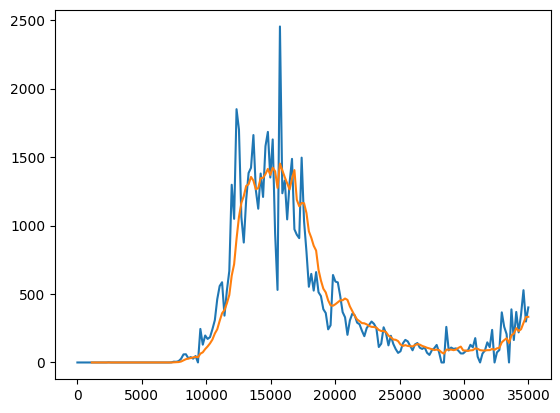

In [30]:
import matplotlib.pyplot as plt
df_belgie = df[df['Country/Region']=='Belgium'].copy()
display(df_belgie)
df_7_daags_gemiddelde = df_belgie['New cases'].rolling(7).mean()
plt.plot(df_belgie.index, df_belgie['New cases'])
plt.plot(df_7_daags_gemiddelde)
plt.show()